# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_df = pd.merge(mouse_metadata,study_results,  on = 'Mouse ID', how = 'right')


# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
unique_mice = mouse_df['Mouse ID'].unique()
num_mice = len(unique_mice)

print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

print(duplicate_mice)



['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = mouse_df[mouse_df['Mouse ID'].isin(duplicate_mice)]

duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df[~mouse_df['Mouse ID'].isin(duplicate_data['Mouse ID'])]

clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [17]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_df["Mouse ID"].nunique()


248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame(name='Mean Tumor Volume')
summary_stats['Median Tumor Volume'] = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_stats['Tumor Volume Variance'] = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_stats['Tumor Volume Std'] = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_stats['Tumor Volume Std Err'] = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor VolumeVariance,Tumor Volume Std,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_stats = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Display the summary statistics table
agg_summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mouse ID/Timepoints')

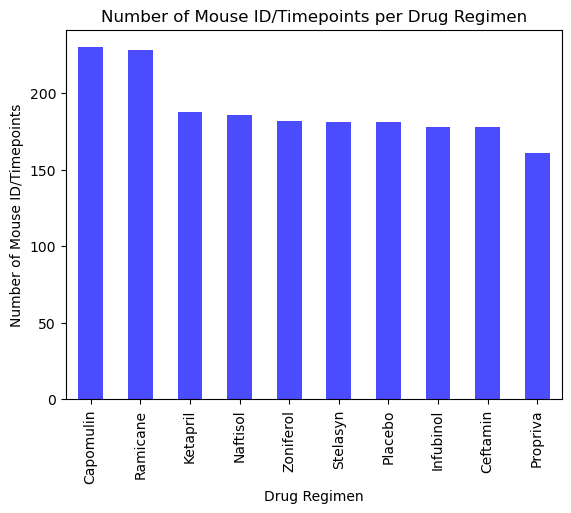

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = mouse_df['Drug Regimen'].value_counts()

# Create a bar plot
drug_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

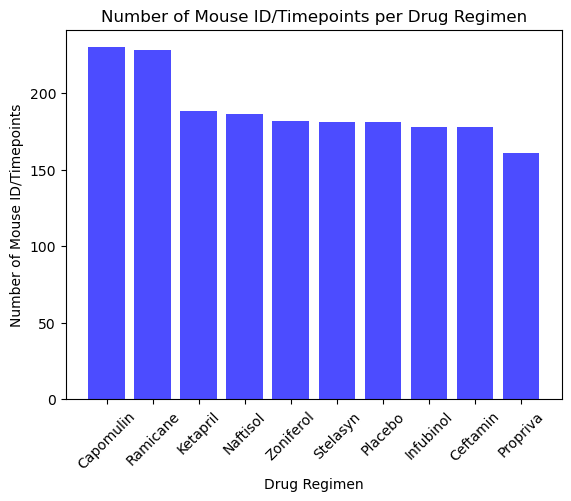

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = mouse_df['Drug Regimen'].value_counts()

# Get the drug regimens and their corresponding counts
regimens = drug_counts.index
counts = drug_counts.values

# Create the bar plot
plt.bar(regimens, counts, color='blue', alpha=0.7)

# Set the plot title and labels
plt.title('Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.xticks(rotation=45)


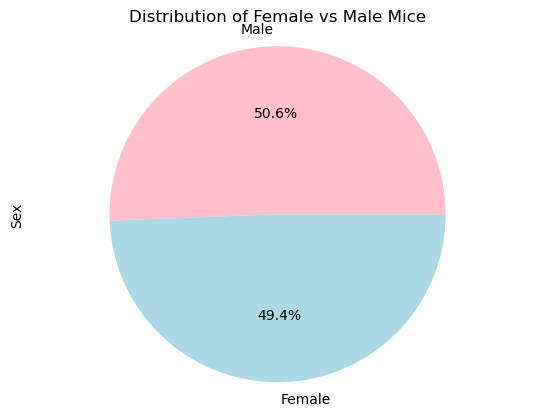

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = mouse_df['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'])

plt.title('Distribution of Female vs Male Mice')


plt.axis('equal')

plt.show()


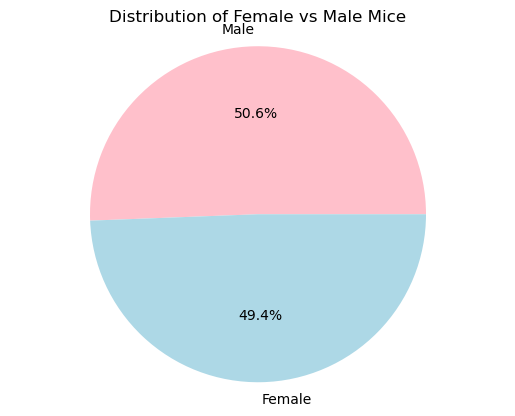

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = mouse_df['Sex'].value_counts()

genders = gender_counts.index
counts = gender_counts.values
plt.pie(counts, labels=genders, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Distribution of Female vs Male Mice')

plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_df.groupby('Mouse ID')['Timepoint'].max().reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(mouse_df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='left')



In [42]:
##Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


##Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

##Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    #add subset 
    tumor_vol_data.append(tumor_volumes)
    #Determine outliers using upper and lower bounds
    q1 = tumor_volumes.quantile(0.25)
    q3 = tumor_volumes.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers = tumor_volumes[(tumor_volumes > upper_bound) | (tumor_volumes < lower_bound)]
    

    print(f"Potential outliers for {treatment}:")
    print(outliers)
    print()


Potential outliers for Capomulin:
1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Potential outliers for Ramicane:
1814    22.050126
Name: Tumor Volume (mm3), dtype: float64

Potential outliers for Infubinol:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Potential outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)



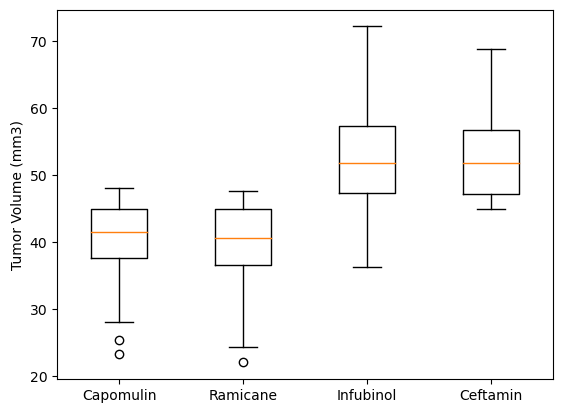

In [43]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data,labels = treatments)
# Set labels and title
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [45]:
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


## Line and Scatter Plots

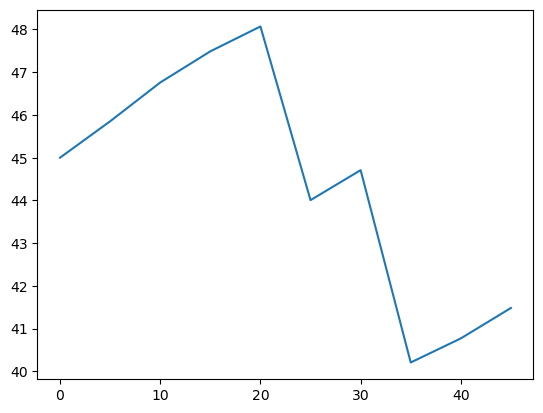

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_table = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin' ]

mouse_data = cap_table.loc[cap_table["Mouse ID"] ==  "l509"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

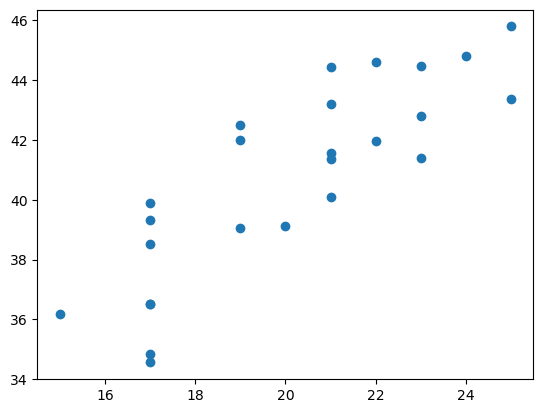

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_table = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin' ]

cap_avg = cap_table.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])


## Correlation and Regression

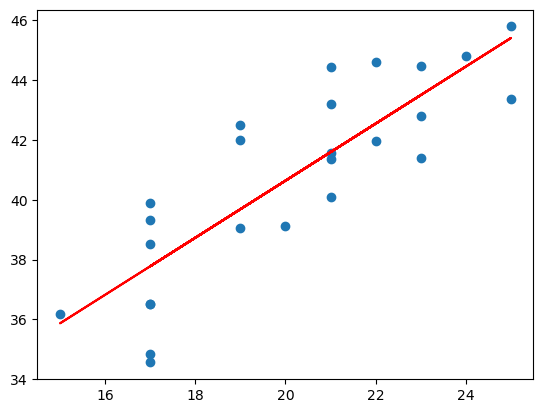

In [49]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#model = st.linregress(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"]) 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.plot(cap_avg["Weight (g)"], cap_avg["Weight (g)"] * slope + intercept , color = "red")

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)